# Residence time distribution example

At time $t=0$, a tracer was pulsed into the feed of the inlet to a reactor. The concentration in the effluent is measured as a function of time $C_e(t)$.

From this the residence time distribution $E(t)$, the cumulative residence time distribution $E_c(t)$, and the moments of $E(t)$ (which are $t_m$,$\sigma^2$,$s^3$) can be determined.

Area under Ce =  51.05
Area under E =  1.00
tm =  5.10
sigma_squared =  6.04
s_cubed =  2.88

        t    Ce         E        Ec
0    0.0   0.0  0.000000  0.000000
1    1.0   1.4  0.027424  0.000000
2    2.0   5.0  0.097943  0.013712
3    3.0   8.0  0.156709  0.076396
4    4.0  10.0  0.195886  0.203722
5    5.0   8.0  0.156709  0.380020
6    6.0   6.0  0.117532  0.556317
7    7.0   4.0  0.078355  0.693438
8    8.0   3.0  0.058766  0.791381
9    9.0   2.2  0.043095  0.859941
10  10.0   1.5  0.029383  0.910872
11  12.0   0.6  0.011753  0.947111
12  14.0   0.0  0.000000  0.967679


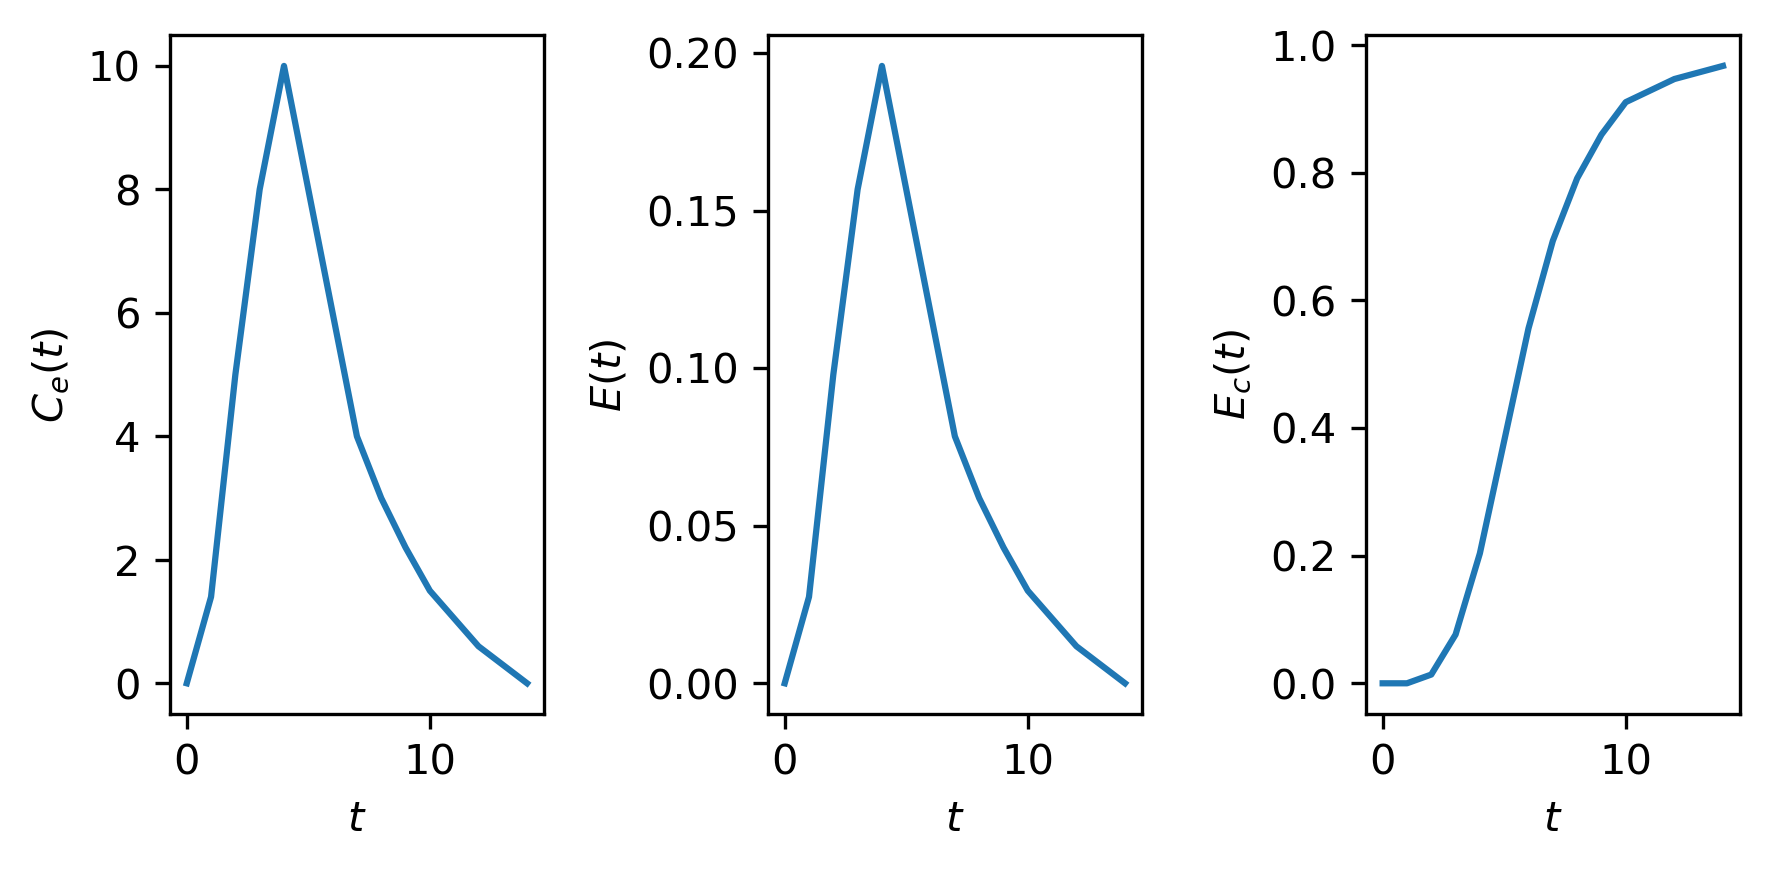

In [83]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

t = np.array([0,1,2,3,4,5,6,7,8,9,10,12,14])
Ce = np.array([0,1.4,5,8,10,8,6,4,3,2.2,1.5,0.6,0])

Ce_integral = np.trapz(Ce,t)
print('Area under Ce = ','{:.2f}'.format(Ce_integral))

E = Ce / Ce_integral
E_integral = np.trapz(E,t)
print('Area under E = ','{:.2f}'.format(E_integral))

Ec = []
for i,val in enumerate(t):
    Ec.append(np.trapz(E[0:i]))

tm = np.trapz(t*E,t)
print('tm = ','{:.2f}'.format(tm))

sig_sq = np.trapz((t-tm)**2*E,t)
print('sigma_squared = ','{:.2f}'.format(sig_sq))

sig = sig_sq**(0.5)
s_cub = 1 / sig**(3/2) * np.trapz((t-tm)**3*E,t)
print('s_cubed = ','{:.2f}'.format(s_cub))

df = pd.DataFrame((np.vstack((t,Ce,E,Ec)).T),columns=['t','Ce','E','Ec'])

print('\n',df)

fig = plt.figure(figsize=(6,3),dpi=300)
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.plot(t,Ce)
ax1.set_xlabel('$t$')
ax1.set_ylabel('$C_e(t)$')

ax2.plot(t,E)
ax2.set_xlabel('$t$')
ax2.set_ylabel('$E(t)$')

ax3.plot(t,Ec)
ax3.set_xlabel('$t$')
ax3.set_ylabel('$E_c(t)$')

plt.tight_layout()
plt.show()